# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
# Import your libraries
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom
import seaborn as sns

# Challenge 1 - Generate and Plot Normal Distributions

#### Step 1: Generate samples and test normal distribution

Use mean=50, standard_deviation=5, and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed. Test your normal distributions with [`scipy.stats.normaltest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html).


*Hint: Read the documentation for `scipy.stats.normaltest`. The function does not simply return Yes or No for whether your data is normal distribution. It returns the likelihood.*

In [2]:
# Your code here
a = np.random.normal(50, 5, size=10)
b = np.random.normal(50, 5, size=50)
c = np.random.normal(50, 5, size=500)
d = np.random.normal(50, 5, size=5000)
for n in [a,b,c,d]:
    k2, p = stats.normaltest(n)
    print(f'statistic:{k2}, pvalue: {p}')

statistic:0.8171992909765595, pvalue: 0.6645802467688157
statistic:0.5943442490320812, pvalue: 0.74291612727731
statistic:3.1785070957045205, pvalue: 0.20407788927194848
statistic:0.9372905814776711, pvalue: 0.6258495384165622


/usr/lib/python3/dist-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


#### Interpret the normaltest results and make your observations.

In [3]:
# Explain the test results here
print('If the pvalue is smaller than alpha, it means that the data is unlikely uniform.')

If the pvalue is smaller than alpha, it means that the data is unlikely uniform.


#### Step 2: Plot normal distributions

Use matplotlib subplots to plot a histogram of each sample. 

*Hints:*
- Use subplots to compare your figures side by side.

- Your output should look like below:

![normal distributions with different sample sizes](ch-1.png)

(array([1., 0., 0., ..., 0., 0., 1.]),
 array([30.98791337, 30.99568163, 31.0034499 , ..., 69.81371594,
        69.8214842 , 69.82925247]),
 <a list of 5000 Patch objects>)

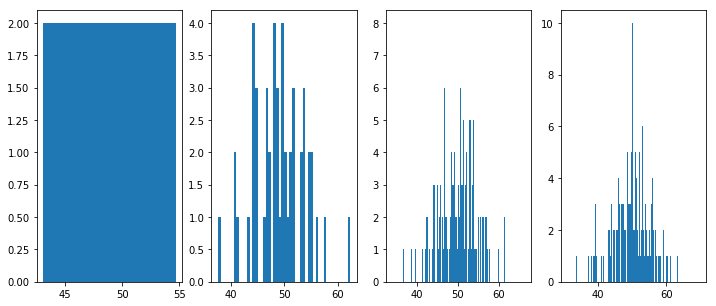

In [4]:
fig,  (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(12,5))
ax1.hist(a, 5) 
ax2.hist(b, 50) 
ax3.hist(c, 500) 
ax4.hist(d, 5000) 

#### Compare the distributions above. What do you observe? Explain with the Central Limit Theorem.

In [5]:
# Your comment and explanation here
print('Cuanto mayor es mi sample size, mas tendencia tiene a seguir una distribución normal')

Cuanto mayor es mi sample size, mas tendencia tiene a seguir una distribución normal


# Challenge 2 - Plot Probability Mass Function (PMF)

#### Background knowledge

[PMF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

#### Question: We assume that the probability of clicking an Ad in a Youtube video is 0.15. We have a sample of 5 people who wathched the video and we want to plot the PMF for a binomial distribution.

*Hint: use binom from `scipy.stats.binom`. Your output should look like below:*

![binom 10](ch-2.png)

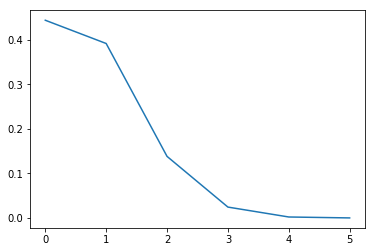

In [6]:
# Your code here
n, p = 5, 0.15
mean, var, skew, kurt = binom.stats(n, p, moments='mvsk')
fig, ax = plt.subplots(1, 1)
x = np.arange(0,6)
ax.plot(x, binom.pmf(x, 5, 0.15))

#### Explain what you observe from the plot above

In [7]:
print('The probability that 0 people click is 0.45 while the probability that the 5 people click is almost 0')

The probability that 0 people click is 0.45 while the probability that the 5 people click is almost 0


#### Now plot PMP with 50, 500, and 5000 visitors.

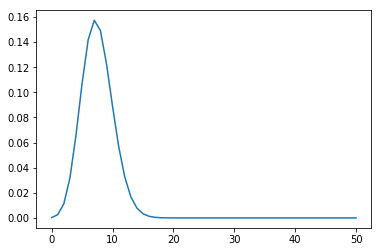

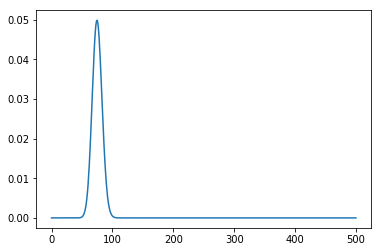

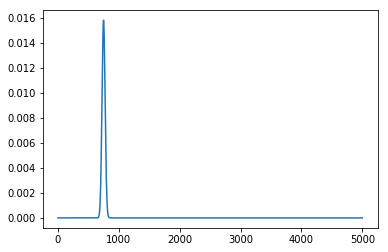

In [8]:
for i in [50,500,5000]:
    fig, ax= plt.subplots(1, 1)
    x = np.arange(0,i+1)
    binomial = stats.binom.pmf(x,i, 0.15)
    ax.plot(binomial)

#### What did you notice from the distribution plots? Comment your findings.

In [9]:
# Your comment here
print('Cuanto mayor es el numero de sucesos la probabilidad de sucesos exitosos tambien se desplaza.')

# Challenge 3

#### Reaserch the Poisson distribution. Write about your own understanding of the Poisson distribution.

In [10]:
# mu es el numero de veces que se espera que un suceso sea exitoso en un determinado intervalo
# La k es el numero de veces que ocurre el evento

#### A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?

*Hint: use `scipy.stats.poisson`*

In [16]:
from scipy.stats import poisson
p = poisson.pmf(320, 300)
p

0.011612348610402475

#### What is the probability of getting 60 visits?

In [18]:
p = poisson.pmf(60, 300)
p

2.622743762294515e-64

#### Plot the distribution of the probability for getting 0-1000 visits.

*Hints:* 

- Create a list to store the Poisson distribution probabilities for n=0 to 1000. Then plot the probabilities.

- Your plot should look like below:

![poisson distribution](ch-3.png)

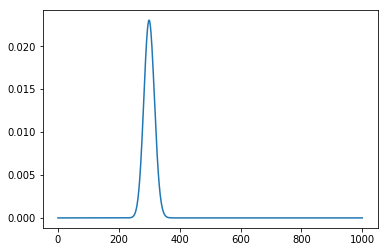

In [20]:
fig, ax = plt.subplots(1, 1)
poisson_list = []
for i in range(1001):
    poisson_list.append(poisson.pmf(i, 300))
x = np.arange(1001)
ax.plot(x, poisson_list)